In [5]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F


In [2]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\91958/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth
100.0%
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\91958/.cache\torch\checkpoints\fcn_resnet101_coco-7ecb50ca.pth
100.0%


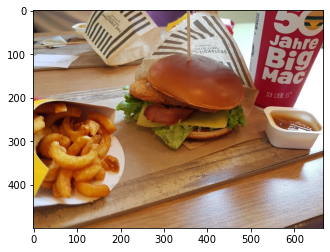

In [17]:
img = Image.open('C://Users//91958//159065300581.jpeg')
plt.imshow(img); plt.show()


In [18]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),       
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                            std = [0.229, 0.224, 0.225])])


transformed_image = transform(img).unsqueeze(0)


### And lastly, we unsqueeze the image so that it becomes [1 x input_Ch x H x W] from [output_Ch x H x W]. 

###This is required since we need a batch while passing it through the network.

In [19]:
fcn

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [20]:
out = fcn(transformed_image)['out'] 


##the output of the model is a OrderedDict so we need to take the out key from that to get the output of the model.
                   



### fcn trained on 21 output channels, 1 becuase on np.unsqueeze(0), 224*224 height and width

print (out.shape) 

torch.Size([1, 21, 224, 224])


In [21]:
##Now what we need to do is, make this 21 channelled output into a 2D image or a 1 channel image, 

##where each pixel of that image corresponds to a class!


##We take a max index for each pixel position, which represents the class.


import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)


(224, 224)


In [22]:
def decode_segmap(image, nc=21):

    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
 
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb


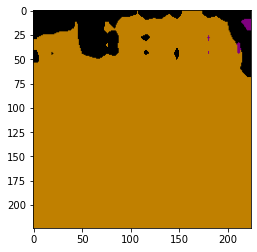

In [23]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()


In [24]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\91958/.cache\torch\checkpoints\deeplabv3_resnet101_coco-586e9e4e.pth
100.0%


torch.Size([1, 21, 224, 224])
(224, 224)


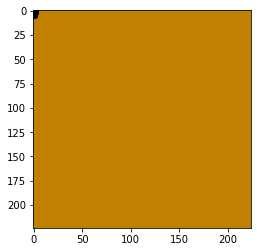

In [25]:
out1 = dlab(transformed_image)['out'] 

print (out1.shape) 
om1 = torch.argmax(out1.squeeze(), dim=0).detach().cpu().numpy()
print (om1.shape)


rgb1 = decode_segmap(om1)
plt.imshow(rgb1); plt.show()


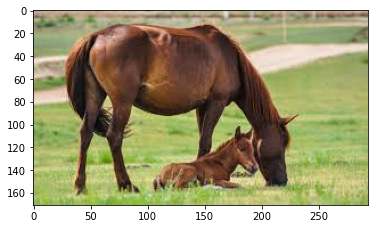

In [28]:
img2 = Image.open('C://Users//91958//download.jpg')
plt.imshow(img2); plt.show()

In [32]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),       
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                            std = [0.229, 0.224, 0.225])])


transformed_image1 = transform(img2).unsqueeze(0)


In [34]:
out2 = fcn(transformed_image1)['out'] 

print (out2.shape) 

torch.Size([1, 21, 224, 224])


(224, 224)


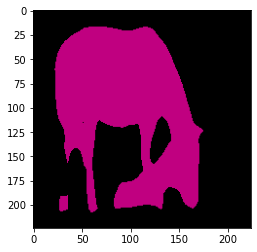

In [38]:
om2 = torch.argmax(out2.squeeze(), dim=0).detach().cpu().numpy()
print(om2.shape)

rgb2 = decode_segmap(om2) 
plt.imshow(rgb2); 
plt.show()